In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))
df = pd.read_csv("/kaggle/input/map-charting-student-math-misunderstandings/train.csv")
test = pd.read_csv("/kaggle/input/map-charting-student-math-misunderstandings/test.csv")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## **Data Analysis**

In [2]:
df.head()

,row_id,QuestionId,QuestionText,MC_Answer,StudentExplanation,Category,Misconception
0,0,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),0ne third is equal to tree nineth,True_Correct,NaN
1,1,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),1 / 3 because 6 over 9 is 2 thirds and 1 third...,True_Correct,NaN
2,2,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),"1 3rd is half of 3 6th, so it is simplee to un...",True_Neither,NaN
3,3,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),1 goes into everything and 3 goes into nine,True_Neither,NaN
4,4,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),1 out of every 3 isn't coloured,True_Correct,NaN


In [3]:
print(df.shape)
print(df['Category'].unique())
print(len(df['Misconception'].unique()))

(36696, 7)
['True_Correct' 'True_Neither' 'True_Misconception' 'False_Neither'
 'False_Misconception' 'False_Correct']
36


In [6]:
df['Misconception'] = df['Misconception'].fillna("No_Misconception")
df.head()

,row_id,QuestionId,QuestionText,MC_Answer,StudentExplanation,Category,Misconception
0,0,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),0ne third is equal to tree nineth,True_Correct,No_Misconception
1,1,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),1 / 3 because 6 over 9 is 2 thirds and 1 third...,True_Correct,No_Misconception
2,2,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),"1 3rd is half of 3 6th, so it is simplee to un...",True_Neither,No_Misconception
3,3,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),1 goes into everything and 3 goes into nine,True_Neither,No_Misconception
4,4,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),1 out of every 3 isn't coloured,True_Correct,No_Misconception



 Category Distribution:
Category
True_Correct           14802
False_Misconception     9457
False_Neither           6542
True_Neither            5265
True_Misconception       403
False_Correct            227
Name: count, dtype: int64


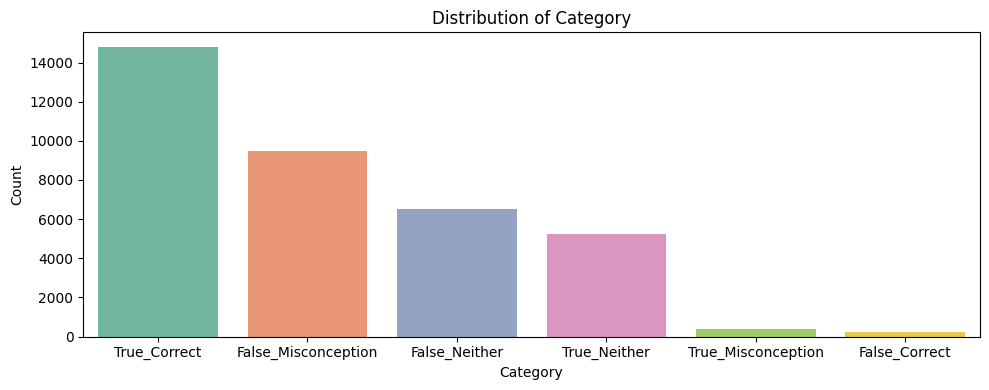

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
print("\n Category Distribution:")
category_counts = df['Category'].value_counts()
print(category_counts)

# Plot category distribution
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='Category', order=category_counts.index, palette='Set2')
plt.title("Distribution of Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


 Misconception Distribution (All Classes):
Misconception
No_Misconception                          26836
Incomplete                                 1454
Additive                                    929
Duplication                                 704
Subtraction                                 620
Positive                                    566
Wrong_term                                  558
Irrelevant                                  497
Wrong_fraction                              418
Inversion                                   414
Mult                                        353
Denominator-only_change                     336
Whole_numbers_larger                        329
Adding_across                               307
WNB                                         299
Tacking                                     290
Unknowable                                  282
Wrong_Fraction                              273
SwapDividend                                206
Scale                         

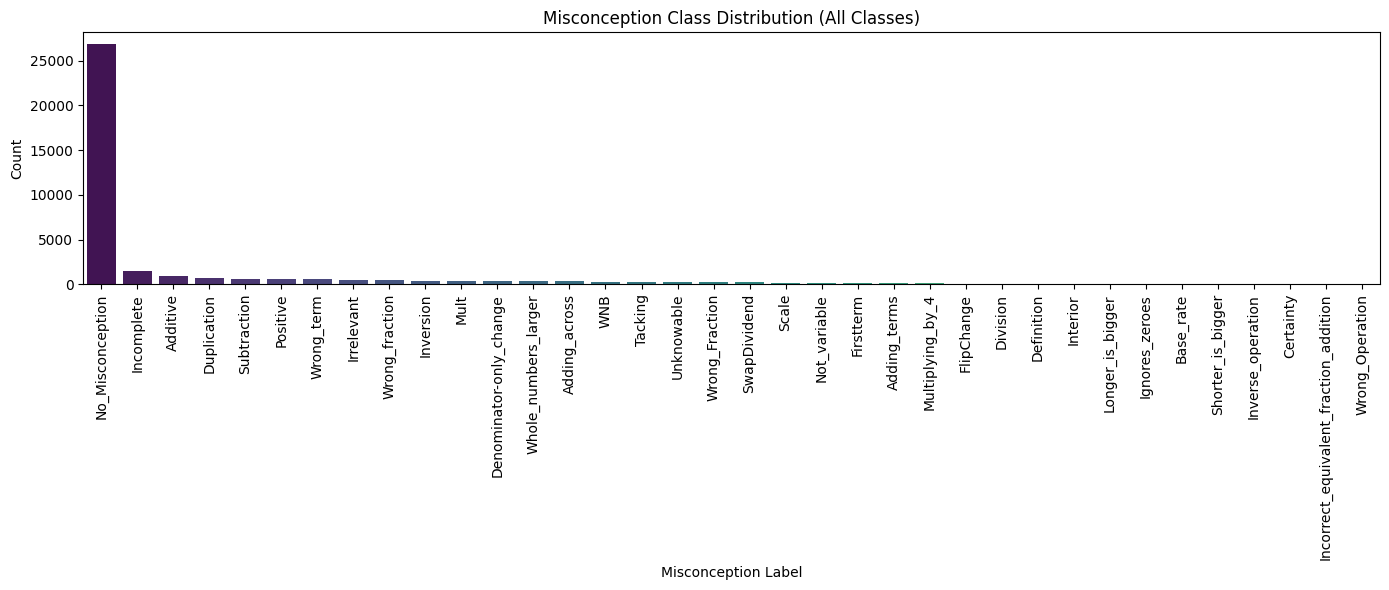

In [8]:
misconception_counts = df['Misconception'].value_counts()
print("\n Misconception Distribution (All Classes):")
print(misconception_counts)

# Plot all misconception classes
plt.figure(figsize=(14, 6))
sns.barplot(x=misconception_counts.index, y=misconception_counts.values, palette="viridis")
plt.title("Misconception Class Distribution (All Classes)")
plt.xlabel("Misconception Label")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Misconception        Adding_across  Adding_terms  Additive  Base_rate  \
Category                                                                
False_Correct                    0             0         0          0   
False_Misconception            306            97       891         22   
False_Neither                    0             0         0          0   
True_Correct                     0             0         0          0   
True_Misconception               1             0        38          1   
True_Neither                     0             0         0          0   

Misconception        Certainty  Definition  Denominator-only_change  Division  \
Category                                                                        
False_Correct                0           0                        0         0   
False_Misconception         18          51                      332        58   
False_Neither                0           0                        0         0   
True_Corre

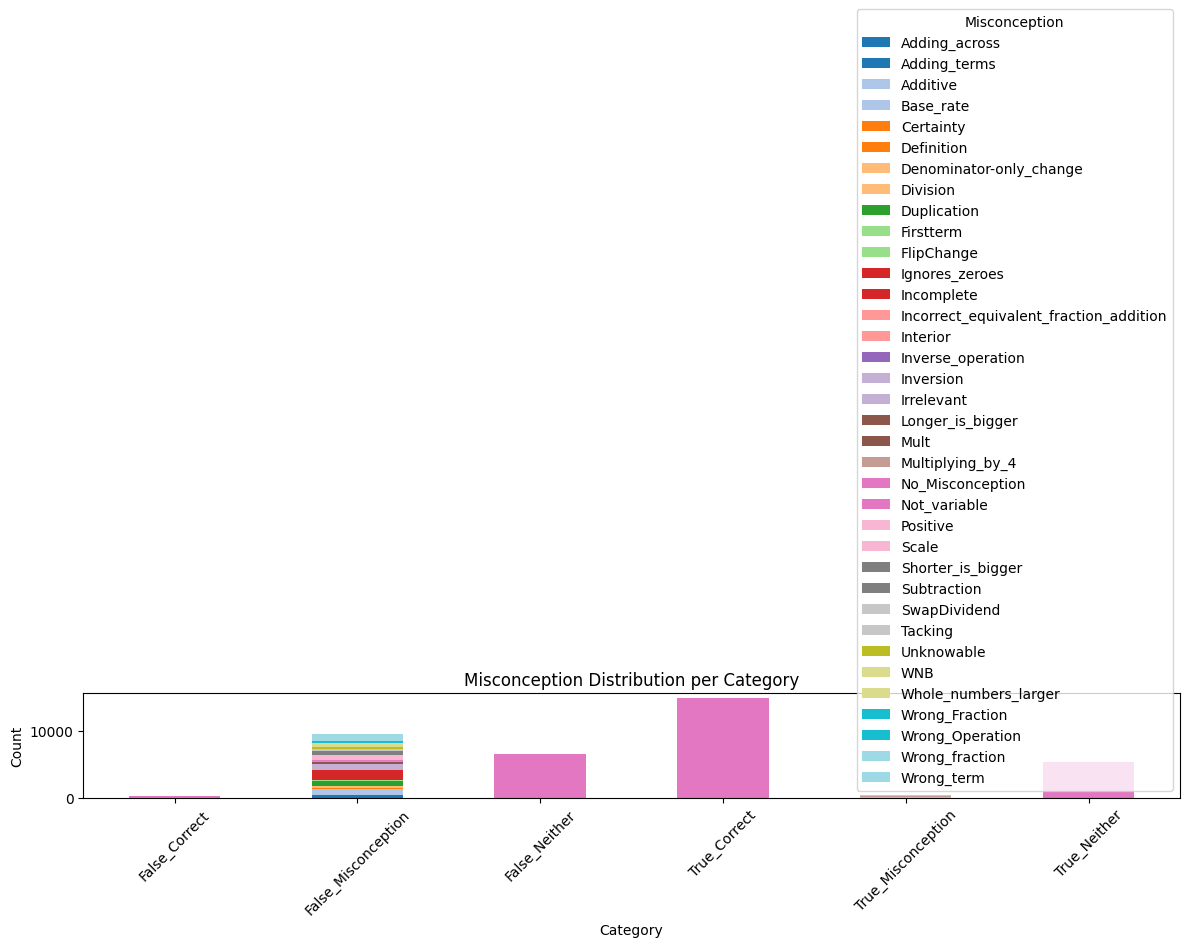

In [9]:
cross_tab = pd.crosstab(df['Category'], df['Misconception'])
print(cross_tab)
cross_tab.plot(kind="bar", stacked=True, figsize=(12,6), colormap="tab20")
plt.title("Misconception Distribution per Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
duplicates = df.duplicated(subset=["StudentExplanation", "Category", "Misconception","QuestionText","MC_Answer" ])
print(f" Duplicate rows: {duplicates.sum()}")
# Count exact duplicates across all columns
full_duplicates = df.duplicated()
print(f" Exact duplicates (all columns): {full_duplicates.sum()}")
df = df.drop_duplicates(subset=["StudentExplanation", "Category", "Misconception", "QuestionText", "MC_Answer"]).reset_index(drop=True)
print(f" New shape after dropping: {df.shape}")
df['Label'] = df['Category'] + ':' + df['Misconception']
df.Label.value_counts()

 Duplicate rows: 736
 Exact duplicates (all columns): 0
 New shape after dropping: (35960, 7)


Label
True_Correct:No_Misconception              14476
False_Neither:No_Misconception              6431
True_Neither:No_Misconception               5219
False_Misconception:Incomplete              1389
False_Misconception:Additive                 883
                                           ...  
True_Misconception:Adding_across               1
True_Misconception:Base_rate                   1
True_Misconception:Longer_is_bigger            1
True_Misconception:Not_variable                1
True_Misconception:Whole_numbers_larger        1
Name: count, Length: 65, dtype: int64

In [8]:
df.head()

,row_id,QuestionId,QuestionText,MC_Answer,StudentExplanation,Category,Misconception,Label
0,0,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),0ne third is equal to tree nineth,True_Correct,No_Misconception,True_Correct:No_Misconception
1,1,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),1 / 3 because 6 over 9 is 2 thirds and 1 third...,True_Correct,No_Misconception,True_Correct:No_Misconception
2,2,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),"1 3rd is half of 3 6th, so it is simplee to un...",True_Neither,No_Misconception,True_Neither:No_Misconception
3,3,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),1 goes into everything and 3 goes into nine,True_Neither,No_Misconception,True_Neither:No_Misconception
4,4,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),1 out of every 3 isn't coloured,True_Correct,No_Misconception,True_Correct:No_Misconception


## **Model Building and Evaluation**

In [25]:
import os
model_path = "/kaggle/input/allminilm-l6-v2-sbert3"
print(os.listdir("/kaggle/input/allminilm-l6-v2-sbert3"))
for root, dirs, files in os.walk(model_path):
    print(f"\nDirectory: {root}")
    for f in files:
        print(f" - {f}")

['config.json', '1_Pooling', 'README.md', 'tokenizer.json', 'tokenizer_config.json', 'sentence_bert_config.json', 'config_sentence_transformers.json', 'model.safetensors', 'modules.json', 'special_tokens_map.json', 'vocab.txt']

Directory: /kaggle/input/allminilm-l6-v2-sbert3
 - config.json
 - README.md
 - tokenizer.json
 - tokenizer_config.json
 - sentence_bert_config.json
 - config_sentence_transformers.json
 - model.safetensors
 - modules.json
 - special_tokens_map.json
 - vocab.txt

Directory: /kaggle/input/allminilm-l6-v2-sbert3/1_Pooling
 - config.json


2025-08-03 09:07:07.171118: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754212027.394503     133 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754212027.467564     133 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Batches:   0%|          | 0/1124 [00:00<?, ?it/s]

Batches:   0%|          | 0/1837 [00:00<?, ?it/s]

 Train Accuracy: 0.9930 | MAP@3: 0.9964
 Val   Accuracy: 0.8450 | MAP@3: 0.9019
 Status: Overfitting

 Classification Report (Validation):
                                                            precision    recall  f1-score   support

                            False_Correct:No_Misconception       0.97      0.78      0.87       100
                         False_Misconception:Adding_across       0.85      0.95      0.90       100
                          False_Misconception:Adding_terms       0.95      1.00      0.98       100
                              False_Misconception:Additive       0.79      0.77      0.78       177
                             False_Misconception:Base_rate       0.99      1.00      1.00       100
                             False_Misconception:Certainty       0.94      1.00      0.97       100
                            False_Misconception:Definition       0.98      1.00      0.99       100
               False_Misconception:Denominator-only_change  

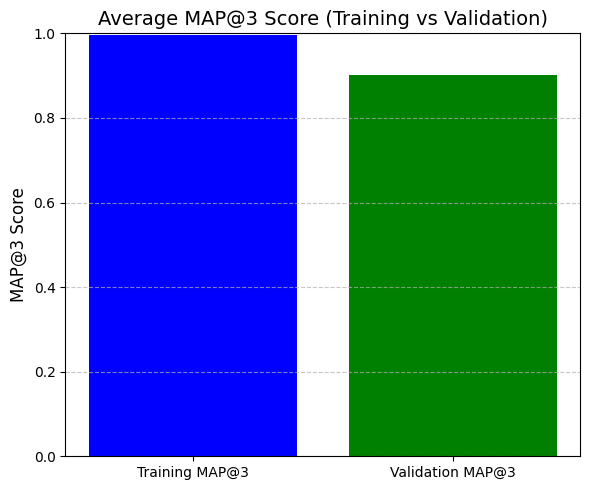

In [9]:
# ensemble (xgboost+logreg+sbert)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
texts = (
    df['QuestionText'] + ' ' +
    df['MC_Answer'] + ' ' +
    df['StudentExplanation']
).tolist()
X = df["QuestionText"].astype(str) + " " + df["MC_Answer"].astype(str)+" "+df.StudentExplanation
le = LabelEncoder()
y_encoded = le.fit_transform(df['Label'])
#  TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X_tfidf = tfidf.fit_transform(X)
# -----------------------------
# Encode Sentences (SBERT)
# -----------------------------
model_path = "/kaggle/input/allminilm-l6-v2-sbert3"
sbert_model = SentenceTransformer(model_path)
X_sbert = sbert_model.encode(texts, show_progress_bar=True)

# -----------------------------
# Dimensionality Reduction (TFIDF + SVD)
# -----------------------------
svd = TruncatedSVD(n_components=300, random_state=42)
X_svd = svd.fit_transform(X_tfidf)

# -----------------------------
# Resample to Minimum 500 per class
# -----------------------------
df_features = pd.DataFrame(X_tfidf.toarray())
df_features['y_encoded'] = y_encoded

upsampled = []
target_count = 500

for cls in df_features['y_encoded'].unique():
    df_cls = df_features[df_features['y_encoded'] == cls]
    if len(df_cls) < target_count:
        df_cls = resample(df_cls, replace=True, n_samples=target_count, random_state=42)
    upsampled.append(df_cls)

df_balanced = pd.concat(upsampled, axis=0).reset_index(drop=True)
X_balanced_tfidf = df_balanced.drop(columns=['y_encoded']).values
y_balanced = df_balanced['y_encoded'].values

# -----------------------------
# Get SBERT and SVD for balanced X
# -----------------------------
X_balanced_svd = svd.transform(X_balanced_tfidf)
X_balanced_sbert = sbert_model.encode([" ".join(map(str, row)) for row in X_balanced_tfidf], show_progress_bar=True)

# -----------------------------
# Train-Test Split
# -----------------------------
X_train_tfidf, X_val_tfidf, y_train, y_val = train_test_split(X_balanced_tfidf, y_balanced, test_size=0.2, stratify=y_balanced, random_state=42)
X_train_svd, X_val_svd = train_test_split(X_balanced_svd, test_size=0.2, stratify=y_balanced, random_state=42)[0:2]
X_train_sbert, X_val_sbert = train_test_split(X_balanced_sbert, test_size=0.2, stratify=y_balanced, random_state=42)[0:2]

# -----------------------------
# Models
# -----------------------------
lr_model = LogisticRegression(max_iter=1000, C=1.0, class_weight='balanced', solver='liblinear')
xgb_model_svd = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', objective='multi:softprob',
                              num_class=len(le.classes_), random_state=42)
xgb_model_sbert = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', objective='multi:softprob',
                                num_class=len(le.classes_), random_state=42)

# -----------------------------
# Evaluation Metric
# -----------------------------
def mapk(y_true, y_pred_probs, k=3):
    top_k_preds = np.argsort(y_pred_probs, axis=1)[:, -k:][:, ::-1]
    score = 0.0
    for i in range(len(y_true)):
        actual = y_true[i]
        for j in range(k):
            if top_k_preds[i][j] == actual:
                score += 1 / (j + 1)
                break
    return score / len(y_true)

def check_overfitting(train_acc, val_acc, train_map3, val_map3, delta=0.05):
    if train_acc - val_acc > delta and train_map3 - val_map3 > delta:
        return "Overfitting"
    elif val_acc - train_acc > delta:
        return "Underfitting"
    else:
        return "Good Fit"

# -----------------------------
# Train and Evaluate
# -----------------------------
lr_model.fit(X_train_tfidf, y_train)
xgb_model_svd.fit(X_train_svd, y_train)
xgb_model_sbert.fit(X_train_sbert, y_train)

# Predict Probas
lr_probs_val = lr_model.predict_proba(X_val_tfidf)
svd_probs_val = xgb_model_svd.predict_proba(X_val_svd)
sbert_probs_val = xgb_model_sbert.predict_proba(X_val_sbert)

lr_probs_train = lr_model.predict_proba(X_train_tfidf)
svd_probs_train = xgb_model_svd.predict_proba(X_train_svd)
sbert_probs_train = xgb_model_sbert.predict_proba(X_train_sbert)

# Average Ensemble
avg_probs_val = (lr_probs_val + svd_probs_val + sbert_probs_val) / 3
avg_probs_train = (lr_probs_train + svd_probs_train + sbert_probs_train) / 3

# Final Predictions
final_preds_val = np.argmax(avg_probs_val, axis=1)
final_preds_train = np.argmax(avg_probs_train, axis=1)

# Evaluate
acc_val = accuracy_score(y_val, final_preds_val)
map3_val = mapk(y_val, avg_probs_val)

acc_train = accuracy_score(y_train, final_preds_train)
map3_train = mapk(y_train, avg_probs_train)

status = check_overfitting(acc_train, acc_val, map3_train, map3_val)
print(f" Train Accuracy: {acc_train:.4f} | MAP@3: {map3_train:.4f}")
print(f" Val   Accuracy: {acc_val:.4f} | MAP@3: {map3_val:.4f}")
print(f" Status: {status}")

print("\n Classification Report (Validation):")
print(classification_report(y_val, final_preds_val, labels=range(len(le.classes_)), target_names=le.classes_, zero_division=0))

# -----------------------------
# Plot
# -----------------------------
plt.figure(figsize=(6, 5))
plt.bar(['Training MAP@3', 'Validation MAP@3'], [map3_train, map3_val], color=['blue', 'green'])
plt.title("Average MAP@3 Score (Training vs Validation)", fontsize=14)
plt.ylabel("MAP@3 Score", fontsize=12)
plt.ylim(0, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## **Submission**

In [14]:
sub = pd.read_csv("/kaggle/input/map-charting-student-math-misunderstandings/sample_submission.csv")
test_texts = test["QuestionText"].astype(str) + " " + test["MC_Answer"].astype(str) + " " + test["StudentExplanation"].astype(str)

# TF-IDF transform
X_test_tfidf = tfidf.transform(test_texts)

# SVD
X_test_svd = svd.transform(X_test_tfidf)

# SBERT
X_test_sbert = sbert_model.encode(test_texts, show_progress_bar=True)

probs_lr_test = lr_model.predict_proba(X_test_tfidf)
probs_svd_test = xgb_model_svd.predict_proba(X_test_svd)
probs_sbert_test = xgb_model_sbert.predict_proba(X_test_sbert)

# Average the ensemble probabilities
avg_probs_test = (probs_lr_test + probs_svd_test + probs_sbert_test) / 3

top3_preds = np.argsort(avg_probs_test, axis=1)[:, -3:][:, ::-1]  # Top 3 predictions

# Map class indices back to original labels
top3_labels = [[le.classes_[i] for i in row] for row in top3_preds]

sub = pd.DataFrame({
    'row_id': test['row_id'],
    'Category:Misconception': [' '.join(row) for row in top3_labels]
})

sub.to_csv("submission.csv", index=False)
print("submission.csv created successfully!")
sub

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

submission.csv created successfully!


,row_id,Category:Misconception
0,36696,True_Correct:No_Misconception True_Neither:No_...
1,36697,False_Misconception:Incomplete False_Misconcep...
2,36698,True_Correct:No_Misconception True_Neither:No_...
